**Objective:**\
The objective of this assignment is to build a predictive model that can predict customer churn for a given company. The intern will use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.


1)Obtain a dataset of customer information, including demographic information, customer behavior, and whether or not the customer has churned.\
2)Perform data cleaning and preprocessing on the dataset, including handling missing data and converting categorical variables to numerical variables.\
3)Explore the data and perform feature selection to select the relevant features that will be used in the model.\
4)\Build a predictive model using machine learning algorithms such as Logistic Regression, Random Forest, or Gradient Boosting.
5)Train the model using a portion of the data and use the remaining data to evaluate the performance of the model.\
6)Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score and AUC-ROC.\
7)Fine-tune the model by trying different parameters or techniques to improve performance.\
8)Create a report detailing the process and results, including the feature selection process, the model used, the evaluation metrics, and the performance of the final model.\
9)Provide a brief on the limitation of the model and the possible future work.



**Input variables:**
   # bank client data:
   1 - age (numeric)\
   2 - job : type of job (categorical: "admin.","unknown  unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") \
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)\
   4 - education (categorical: "unknown","secondary,"primary","tertiary")\
   5 - default: has credit in default? (binary: "yes","no")\
   6 - balance: average yearly balance, in euros (numeric)\
   7 - housing: has housing loan? (binary: "yes","no")\
   8 - loan: has personal loan? (binary: "yes","no")\
   * related with the last contact of the current campaign:\
   9 - contact: contact communication type (categorical: \"unknown","telephone","cellular") \
  10 - day: last contact day of the month (numeric)\
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")\
  12 - duration: last contact duration, in seconds (numeric)\
   * other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)\
  15 - previous: number of contacts performed before this campaign and for this client (numeric)\
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")\

  Output variable (desired target):\
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# importing Laibraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
pd.options.display.float_format = '{:,.6f}'.format
from imblearn.ensemble import BalancedBaggingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.neighbors import KNeighborsClassifier
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from keras.layers import Dropout
# from keras import regularizers
# from tensorflow import keras
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 96)
pd.set_option('display.max_rows', 96)


# importing Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Prediction/bank.csv',sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking missing values

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**if there is no missing value**
 



### Checking Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Checking catagorical values

In [ ]:
categoric_columns = df.select_dtypes(include = object).columns.tolist()
categoric_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
for columns in categoric_columns:
    print(df[columns].value_counts())
    print('#' * 40)

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
########################################
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
########################################
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
########################################
no     4445
yes      76
Name: default, dtype: int64
########################################
yes    2559
no     1962
Name: housing, dtype: int64
########################################
no     3830
yes     691
Name: loan, dtype: int64
########################################
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
########################################
may    1398
jul     7

## checking our dependand variable count

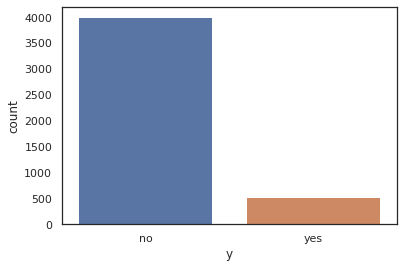

In [ ]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(df["y"]);

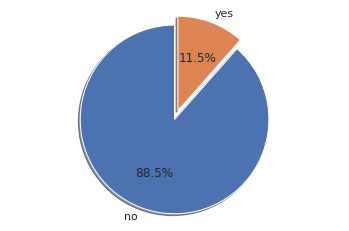

In [ ]:
plt.pie(df["y"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["y"].unique())
plt.axis('equal') ;

### checking numerical columns

In [ ]:
numeric_columns = df.select_dtypes(include = np.number).columns.tolist()
numeric_columns


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

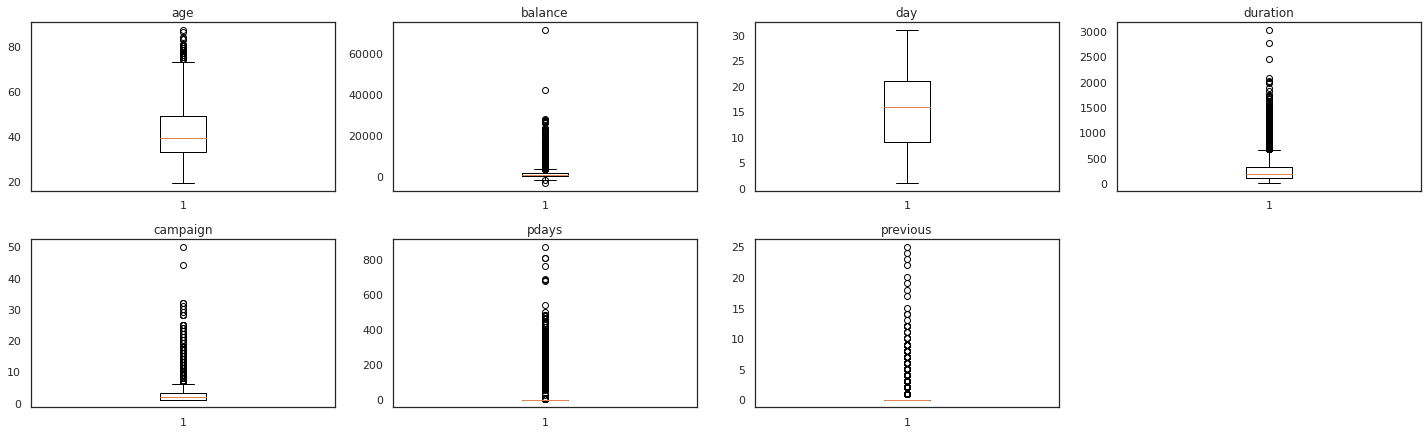

In [ ]:
#outlier  detecting using boxplot

plt.figure(figsize=(20,30))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)
plt.show()        

## Data Preprocessing

In [ ]:
label = df["y"]
label = label.apply(lambda x: 1 if x == "yes" else 0)


In [ ]:
data=df.drop(columns='y')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [ ]:
data1=data.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[categoric_col]).toarray())
data1=data1.join(encoder_df)
data1



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
categoric_col = data.select_dtypes(include = object).columns.tolist()
x=pd.get_dummies(data,columns=categoric_col,drop_first=True)
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_1_transformed=x.copy()

In [ ]:
#checking the shape
X_1_transformed.shape

(4521, 42)

## 1. using vif for feature_selection

In [ ]:
empty_=0
vif_data = pd.DataFrame()
cols_removed_vif=[]
columns_after_vif=[x for x in X_1_transformed.columns]
#Using a while loop to keep removing a feature with VIF value greater 15 one at a time.
while empty_ ==0:
 
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = columns_after_vif
  vif_data["VIF"] = [variance_inflation_factor(X_1_transformed[columns_after_vif].values, i)
                              for i in range(len(columns_after_vif))]  
  # calculating VIF for each feature
  if np.array(vif_data.sort_values('VIF')['VIF'])[-1:]>=15:
    cols_removed_vif.extend([x for x in vif_data.sort_values('VIF')['feature'][-1:] if x not in cols_removed_vif])
    columns_after_vif=[x for x in X_1_transformed.columns if x not in cols_removed_vif]                          
    empty_=0
  else:
    empty_=2
    

In [ ]:
#remaining columns after removing columns with high VIF values.
len(columns_after_vif)

40

In [ ]:
# creating a df with these columns.
vif_final=x[[x for x in x.columns if x not in cols_removed_vif]]

In [ ]:
vif_final.shape

(4521, 40)

### 2.Using L1 Regularization

In [ ]:
# transforming the data to remove skewness
skewness=PowerTransformer(standardize=False)
vif_final=pd.DataFrame(skewness.fit_transform(x), columns=x.columns)

In [ ]:
#splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(x,label,test_size=0.25,stratify=label, random_state=43)

In [ ]:
X_train.shape

(3390, 42)

In [ ]:
#scaling the data 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# fitting the logistic regression model
lr=LogisticRegression(penalty='l1',solver='saga',class_weight='balanced',C=0.01)
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[2585  414]
 [  97  294]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2999
           1       0.42      0.75      0.54       391

    accuracy                           0.85      3390
   macro avg       0.69      0.81      0.72      3390
weighted avg       0.90      0.85      0.87      3390

[[859 142]
 [ 39  91]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1001
           1       0.39      0.70      0.50       130

    accuracy                           0.84      1131
   macro avg       0.67      0.78      0.70      1131
weighted avg       0.89      0.84      0.86      1131



In [ ]:
#creating a data frame of the coefficients and column names
coef_df=pd.DataFrame(zip(x.columns,lr.coef_.reshape(-1,1)),columns=['column','coeff'])
#storing the columns with non zero coefficients
lasso=[x for x in coef_df[coef_df.coeff!=0]['column']]
len(lasso)

12

##  3. Using Quasi

In [ ]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(x)

sum(sel.get_support())

print(
    len([
        i for i in x.columns
        if i not in x.columns[sel.get_support()]
    ]))

[i for i in x.columns if i not in x.columns[sel.get_support()]]

segregated_list = [i for i in x.columns if i in x.columns[sel.get_support()]]
len(segregated_list)

2


40

##  4.Using Information Gain

In [ ]:
# create importances dataframe
importances = mutual_info_classif(x,label)
importances_df = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(importances)],axis=1)
importances_df.columns = ['Features','Importances']
importances_df = importances_df.sort_values(by='Importances',ascending=False)
# Top 30 important features
new_features = importances_df.head(30)

In [ ]:
feature_list = new_features.Features.tolist()

In [ ]:
len(feature_list)

30

## 5. Using Random Forest.

In [ ]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini',class_weight='balanced',random_state= 21,n_jobs=-1)

In [ ]:
rf.fit(x,label)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=21)

In [ ]:
imp_df = pd.DataFrame(rf.feature_importances_)
imp_df.shape

(42, 1)

In [ ]:
feature_imp_df = pd.concat([pd.DataFrame(x.columns),imp_df],axis=1)
feature_imp_df.columns=['features','imp']
feature_imp_df = feature_imp_df.sort_values(by='imp',ascending=False)
feature_imp_df = feature_imp_df.head(30)

In [ ]:
feature_list2 = feature_imp_df.features.tolist()

In [ ]:
# Function to check number similarity of two lists
def list_similarity(l1,l2):
  '''This function return the number of common elements between two given lists 
  and a list of those common elements '''
  list_bool = []
  for elem1 in l1:
    for elem2 in l2: 
      if elem1==elem2:
        list_bool.append(True)
  print('No of commom elements= ',sum(list_bool))
  return list(set(l1).intersection(set(l2)))

In [ ]:
# Check feature similarity between two feature lists obtained above
similar_list = list_similarity(feature_list,feature_list2)

No of commom elements=  22


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x, 0.8)
print('correlated features: ', len(set(corr_features)) )

lista = list(corr_features)
lista.append('label')

set(corr_features)
len(corr_features)

correlated features:  0


0

# EDA

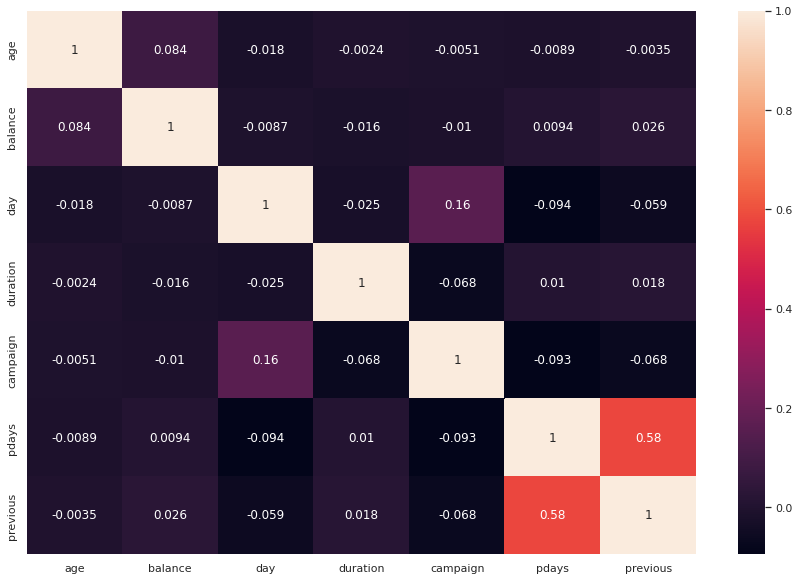

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

##  Features Selected Using VIF

In [ ]:
x.shape

(4521, 42)

In [ ]:
skewness=PowerTransformer(standardize=False)
X=pd.DataFrame(skewness.fit_transform(x[columns_after_vif]), columns=columns_after_vif)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_vif=sc.fit_transform(x)

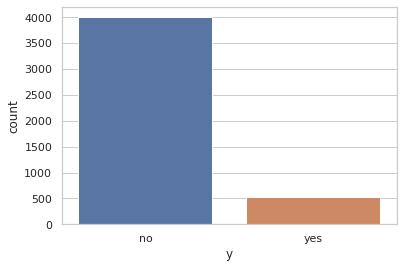

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="y", data=df)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x_vif,label)
print('original  Target dataset shape:',label.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (4521,)
Resample Target dataset shape (8000,)


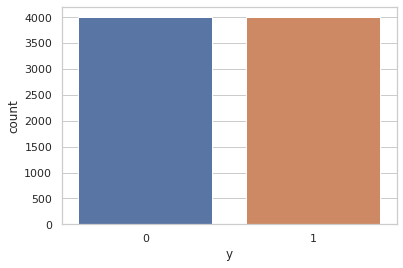

In [ ]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=42)

In [ ]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")




In [ ]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }


In [ ]:
def random_search(clf,parameters,xTrain,Ytrain):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
    grid_obj = RandomizedSearchCV(clf,parameters,scoring = 'roc_auc',cv = cv)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

# creating model with vif features


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       994
           1       0.84      0.86      0.85      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Area under ROC curve :  0.8494255793208554 



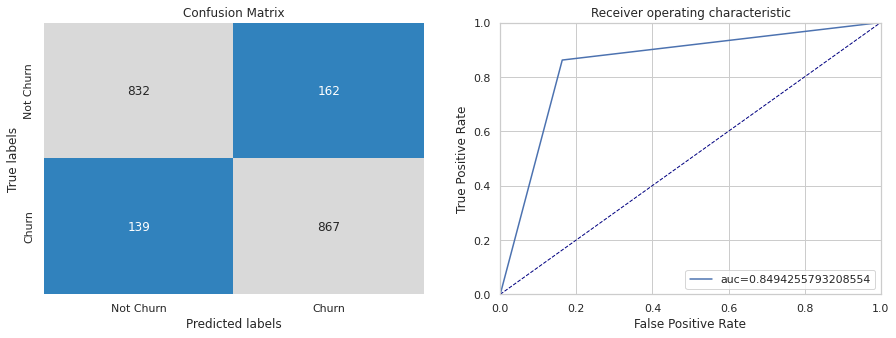

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42)
tree_grid = random_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       994
           1       0.85      0.86      0.86      1006

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Area under ROC curve :  0.8549527783000188 



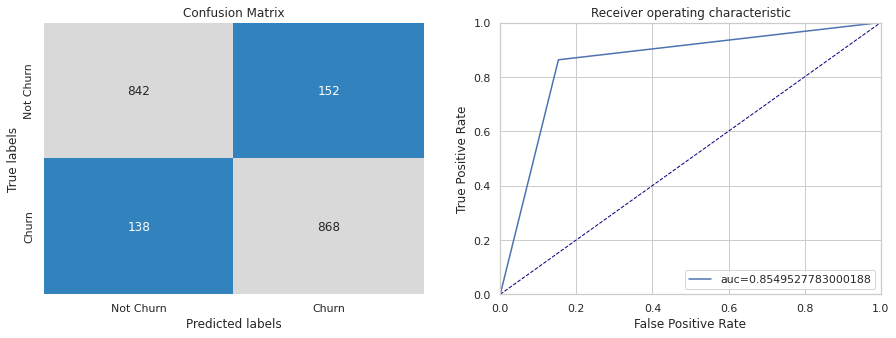

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       994
           1       0.90      0.96      0.93      1006

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Area under ROC curve :  0.9262903464524723 



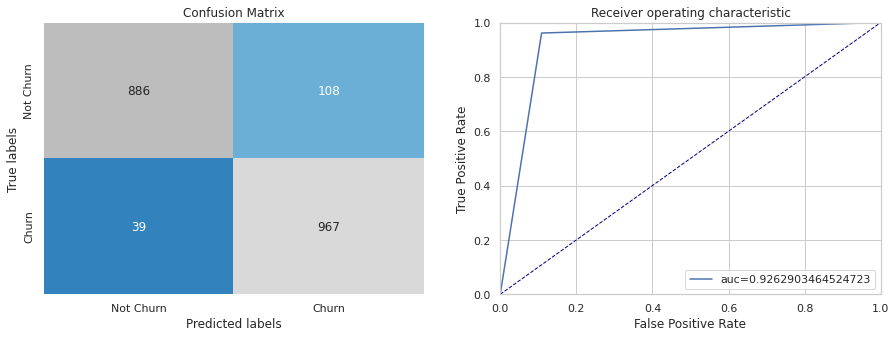

In [ ]:
svm_model = SVC(random_state = 42)
svm_grid = random_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       994
           1       0.92      0.96      0.94      1006

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Area under ROC curve :  0.9388537987367546 



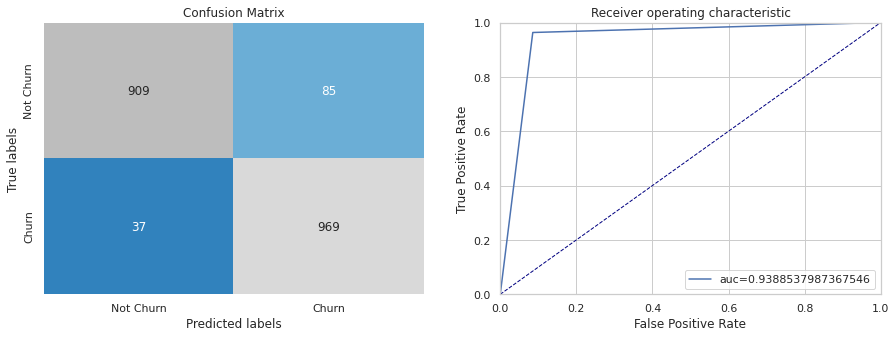

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
randomForest_grid = random_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       994
           1       0.84      0.86      0.85      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Area under ROC curve :  0.8484195431035517 



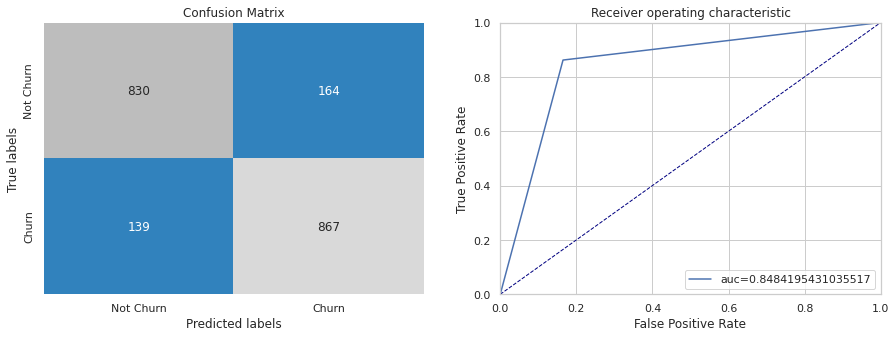

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
xgBoost_grid = random_search(xg_boost,Xgboost_parameters,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       994
           1       0.94      0.97      0.96      1006

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Area under ROC curve :  0.9544293594569405 



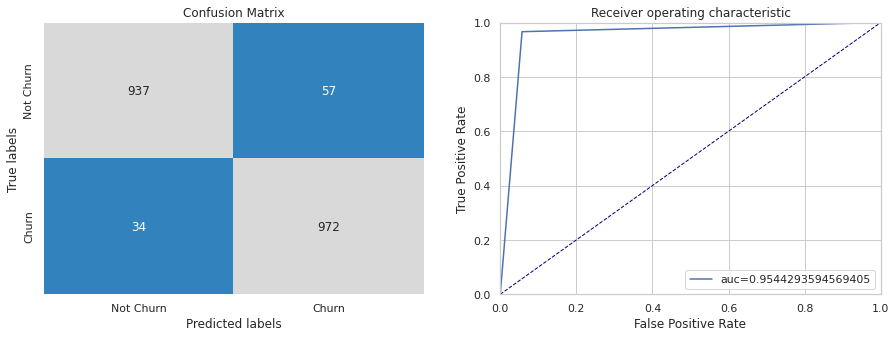

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)

## creating model with lasso features selection

In [ ]:
skewness=PowerTransformer(standardize=False)
X=pd.DataFrame(skewness.fit_transform(x[lasso]), columns=lasso)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_lasso=sc.fit_transform(x)

original  Target dataset shape: (4521,)
Resample Target dataset shape (8000,)


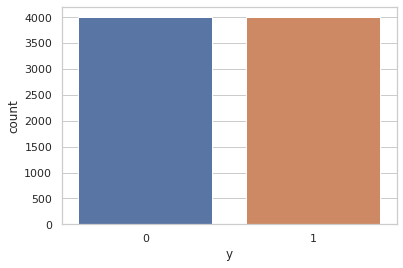

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus1, y_rus1 =BorderlineSMOTE().fit_resample(x_lasso,label)
print('original  Target dataset shape:',label.shape)
print('Resample Target dataset shape',y_rus.shape)
sns.set_style("whitegrid")
sns.countplot(y_rus1)

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(x_rus1,y_rus1,test_size=0.25,random_state=42)


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       994
           1       0.84      0.86      0.85      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Area under ROC curve :  0.8504316155381595 



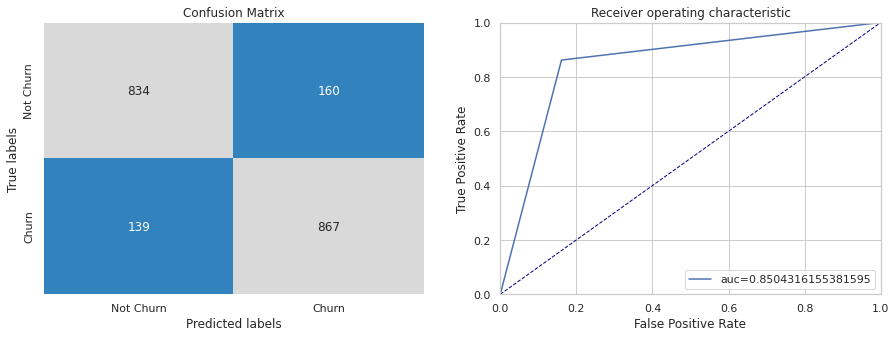

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42)
tree_grid = random_search(decision_tree,Tree_parameters,X_train1,y_train1);
apply_classifier(tree_grid,X_train1, X_test1, y_train1, y_test1)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       994
           1       0.85      0.84      0.85      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Area under ROC curve :  0.8465334752051074 



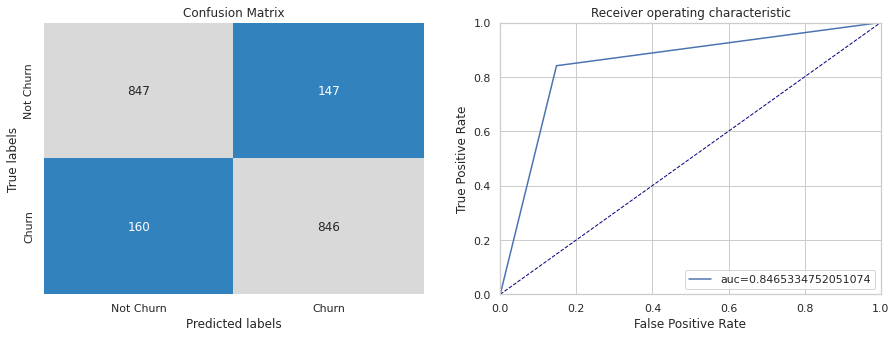

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train1, X_test1, y_train1, y_test1)


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       994
           1       0.90      0.95      0.92      1006

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Area under ROC curve :  0.9218291858506905 



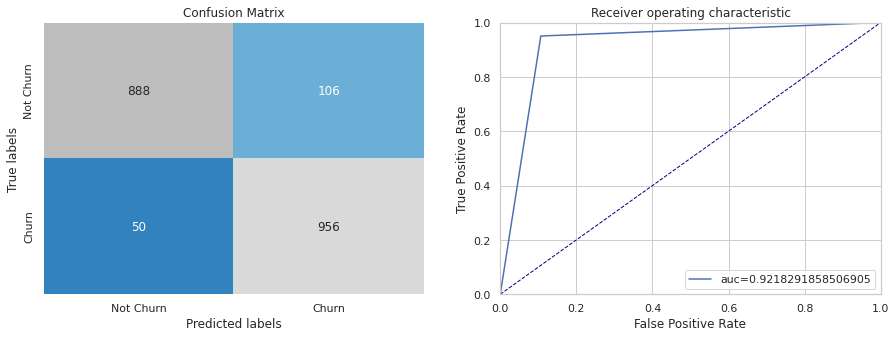

In [ ]:
svm_model = SVC(random_state = 42)
svm_grid = random_search(svm_model,SVM_parameters,X_train1,y_train1);
apply_classifier(svm_model,X_train1, X_test1, y_train1, y_test1)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       994
           1       0.92      0.97      0.94      1006

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Area under ROC curve :  0.938841798304739 



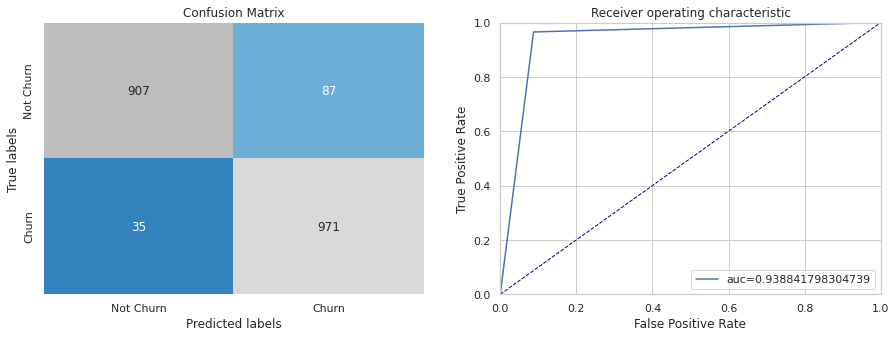

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
randomForest_grid = random_search(random_forest,RandomForest_parameters,X_train1,y_train1);
apply_classifier(randomForest_grid,X_train1, X_test1, y_train1, y_test1)


 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       994
           1       0.84      0.88      0.86      1006

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Area under ROC curve :  0.8588629190650863 



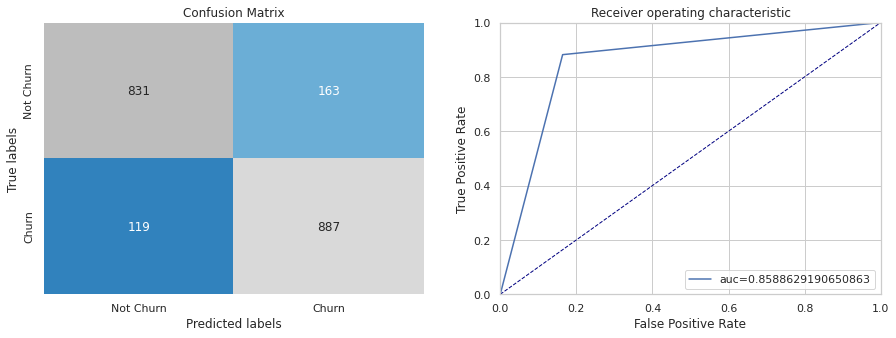

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
xgBoost_grid = random_search(xg_boost,Xgboost_parameters,X_train1,y_train1);
apply_classifier(xgBoost_grid,X_train1, X_test1, y_train1, y_test1)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       994
           1       0.95      0.97      0.96      1006

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Area under ROC curve :  0.955441395890252 



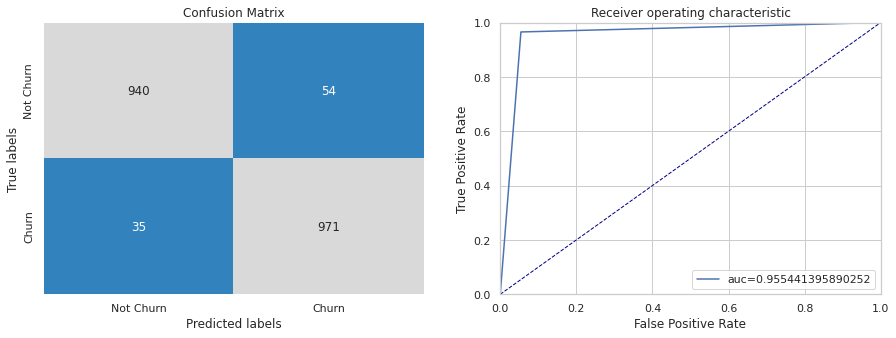

In [ ]:
model1 = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model1,X_train1, X_test1, y_train1, y_test1)

# creating model with random forest and information gain mutual features selection

In [ ]:
skewness=PowerTransformer(standardize=False)
X=pd.DataFrame(skewness.fit_transform(x[similar_list]), columns=similar_list)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_similar=sc.fit_transform(x)

original  Target dataset shape: (4521,)
Resample Target dataset shape (8000,)


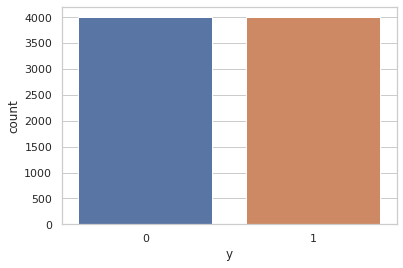

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus2, y_rus2 =BorderlineSMOTE().fit_resample(x_similar,label)
print('original  Target dataset shape:',label.shape)
print('Resample Target dataset shape',y_rus2.shape)
sns.set_style("whitegrid")
sns.countplot(y_rus1)

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(x_rus2,y_rus2,test_size=0.25,random_state=42)


 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       994
           1       0.83      0.90      0.87      1006

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Area under ROC curve :  0.8592399326375749 



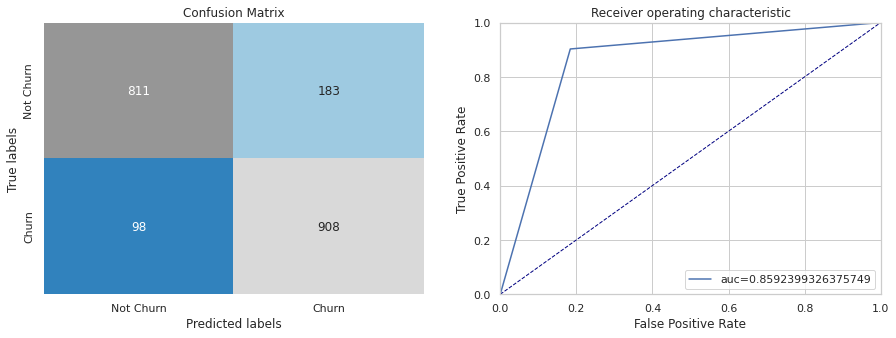

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42)
tree_grid = random_search(decision_tree,Tree_parameters,X_train2,y_train2);
apply_classifier(tree_grid,X_train2, X_test2, y_train2, y_test2)


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       994
           1       0.85      0.86      0.86      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Area under ROC curve :  0.8539587425147305 



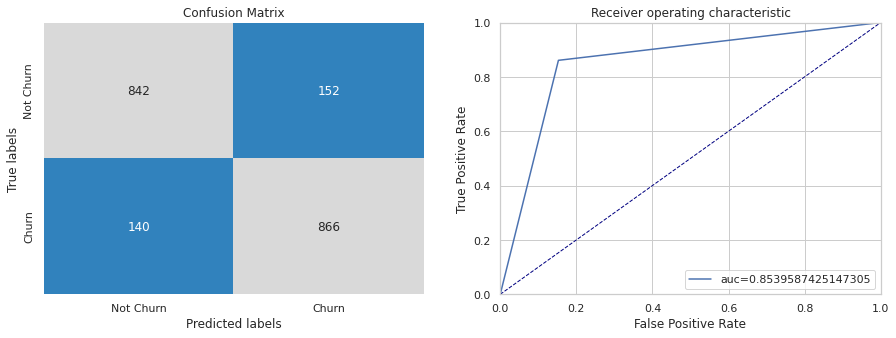

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train2, X_test2, y_train2, y_test2)


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       994
           1       0.90      0.95      0.92      1006

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Area under ROC curve :  0.9198471144961219 



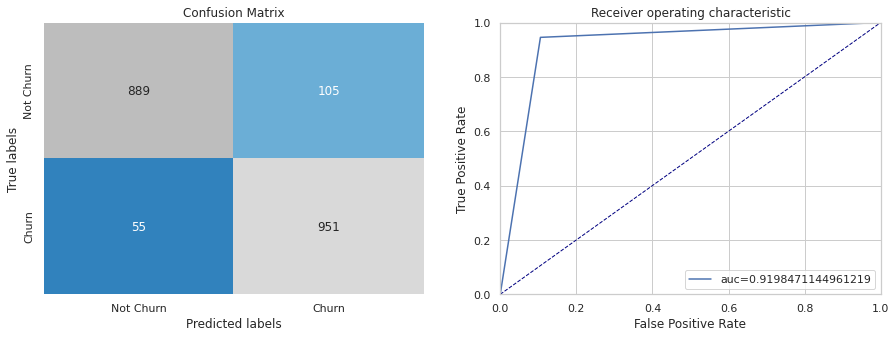

In [ ]:
svm_model = SVC(random_state = 42)
svm_grid = random_search(svm_model,SVM_parameters,X_train2,y_train2);
apply_classifier(svm_model,X_train2, X_test2, y_train2, y_test2)


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       994
           1       0.92      0.95      0.94      1006

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Area under ROC curve :  0.9344046385669884 



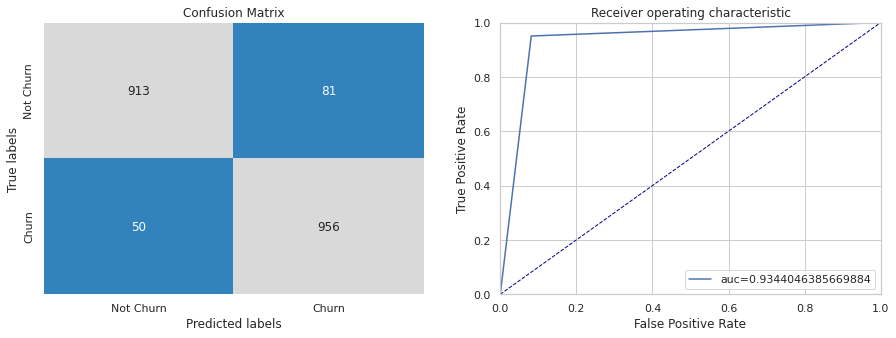

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
randomForest_grid = random_search(random_forest,RandomForest_parameters,X_train2,y_train2);
apply_classifier(randomForest_grid,X_train2, X_test2, y_train2, y_test2)


 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       994
           1       0.81      0.88      0.84      1006

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Area under ROC curve :  0.8367361225004101 



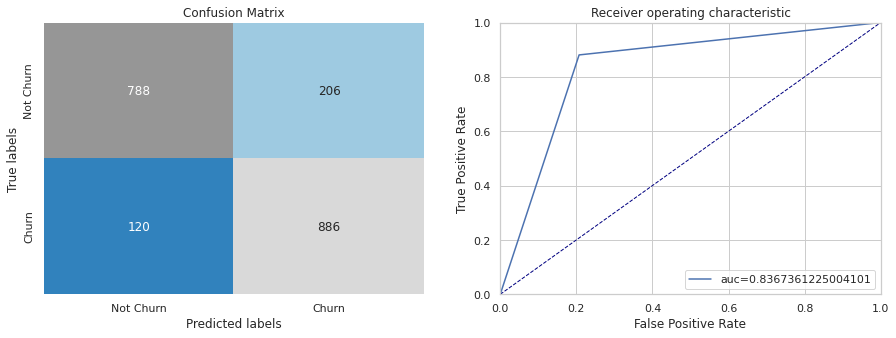

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
xgBoost_grid = random_search(xg_boost,Xgboost_parameters,X_train2,y_train2);
apply_classifier(xgBoost_grid,X_train2, X_test2, y_train2, y_test2)


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       994
           1       0.95      0.97      0.96      1006

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Area under ROC curve :  0.9564474321075558 



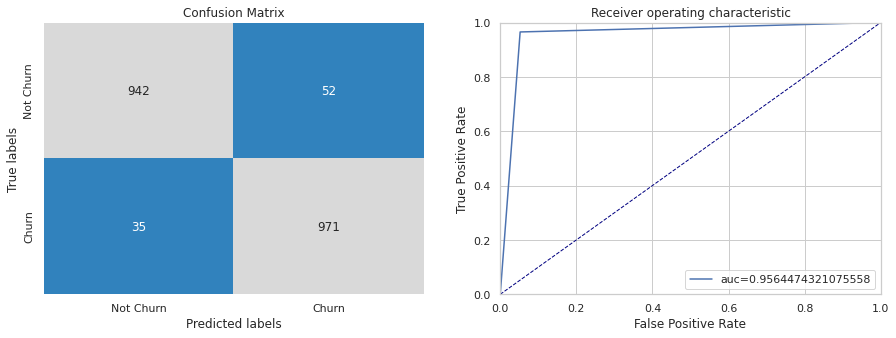

In [ ]:
model2 = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model2,X_train2, X_test2, y_train2, y_test2)

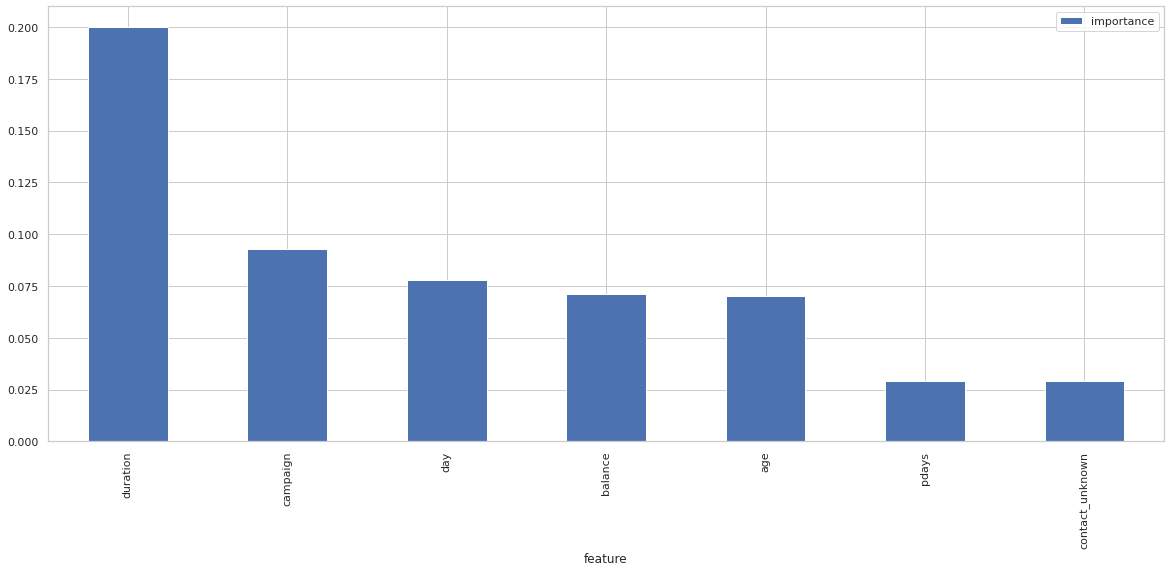

In [ ]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(model2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(20, 8))

# MOdel selection

* i am choosing model adaboost with random forest and info gain common feature.
* it classify 96% accuratly churn

* confusion matric false positive and false negative is less compare to other moddel

* it has high f1 score 

In [ ]:
# saving model
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model2)
 
# Load the pickled model
ada_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
ada_from_pickle.predict(X_test)




array([0, 0, 0, ..., 0, 1, 0])